In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

: 

# 1. Problem at hand
Predict if they survived the titanic disaster

In [23]:
path = r"C:\PYTHON\DATA"
os.chdir(path)
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Check the data types of the columns

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Filling null values

In [25]:
# works as simple imputer; replaces null values in a specific column

titanic['Age']=titanic.groupby(['Sex'])['Age'].transform(lambda x :x.fillna(x.median()))
titanic.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.0,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


# Use simple imputer to fill null values using mean or median

In [26]:
from sklearn.impute import SimpleImputer
print('average age before imputation',titanic['Age'].median())
Age_imputer= SimpleImputer(missing_values=np.nan, strategy= 'median')
titanic['Age']=Age_imputer.fit_transform(titanic[['Age']])
print('average Age after imputation',titanic['Age'].median())


average age before imputation 29.0
average Age after imputation 29.0


In [27]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Check for possible null values in the table

In [28]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
#combine 2 columns that are almost the same Parch and Sibsp
titanic['family_size']= titanic['Parch'] + titanic['SibSp'] + 1
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [30]:
titanic1=titanic.copy()
titanic1= titanic.drop(columns=['SibSp','Parch'])

In [31]:
titanic1.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,7534,9.8458,NaN,S,1
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,349212,7.8958,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,29.0,349217,7.8958,NaN,S,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,11767,83.1583,C50,C,2
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,230433,26.0000,NaN,S,2
881,882,0,3,"Markun, Mr. Johann",male,33.0,349257,7.8958,NaN,S,1
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,7552,10.5167,NaN,S,1
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,C.A./SOTON 34068,10.5000,NaN,S,1
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,SOTON/OQ 392076,7.0500,NaN,S,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,382652,29.1250,NaN,Q,6


In [32]:
titanic1=titanic.copy()
titanic1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [33]:
titanic1.drop(columns=['Cabin'],inplace=True)

In [34]:
titanic1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
family_size    0
dtype: int64

In [35]:
titanic1['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [36]:
titanic1['Sex'].value_counts().index

Index(['male', 'female'], dtype='object', name='Sex')

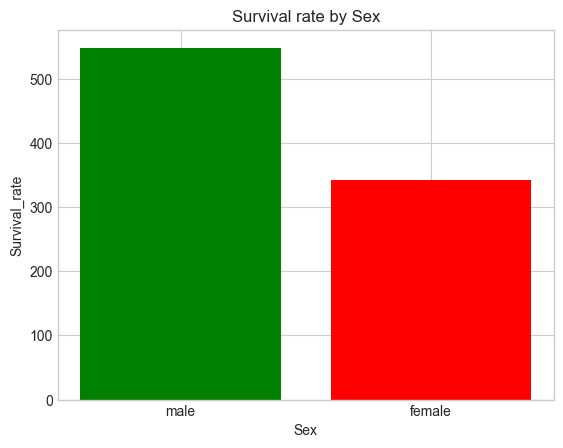

In [37]:
Sex = ['male', 'female']
Survival_rate = titanic1['Survived'].value_counts()
plt.Figure(figsize=(6,4))
plt.style.use('seaborn-v0_8-whitegrid')

plt.bar(Sex,Survival_rate,color=['green','red'])
plt.title('Survival rate by Sex',fontsize=12)
plt.xlabel('Sex')
plt.ylabel('Survival_rate')
plt.show()

# Categorize the age column into groups.
Either child,teenager or adult

In [38]:
bins = [0, 12, 18, 30, 45, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
titanic1['AgeGroup'] = pd.cut(titanic1['Age'], bins=bins, labels=labels, right=False)
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Adult


In [39]:
titanic1['AgeGroup'].value_counts().index

CategoricalIndex(['Young Adult', 'Adult', 'Middle Aged', 'Child', 'Teen',
                  'Senior'],
                 categories=['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'], ordered=True, dtype='category', name='AgeGroup')

In [40]:
titanic1['survival_rate'] = titanic1.groupby('AgeGroup')['Survived'].mean()
titanic1.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3836\2071674763.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic1['survival_rate'] = titanic1.groupby('AgeGroup')['Survived'].mean()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,AgeGroup,survival_rate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Young Adult,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Adult,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Young Adult,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Adult,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Adult,NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_3836\1368316774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = titanic1.groupby('AgeGroup')['Survived'].mean()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (2,).

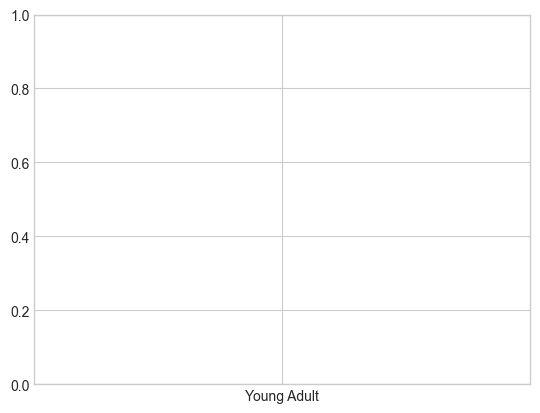

In [41]:
AgeGroup = ['Young Adult', 'Adult', 'Middle Aged', 'Child', 'Teen','Senior']
survival_rate = titanic1.groupby('AgeGroup')['Survived'].mean()
Survival_rate = titanic1['Survived'].value_counts()
plt.Figure(figsize=(6,4))
plt.style.use('seaborn-v0_8-whitegrid')

plt.bar(AgeGroup,Survival_rate,color=['blue','red','black','cyan','salmon','grey'])
plt.title('Survival rate by Age',fontsize=12)
plt.xlabel('AgeGroup')
plt.ylabel('Survival_rate')
plt.ylim(0, 1)
plt.show()

In [ ]:
plt.Figure(figsize=10,6)
sns.boxplot(data=titanic1,x= titanic1[])

In [ ]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Embarked       889 non-null    object  
 11  family_size    891 non-null    int64   
 12  AgeGroup       890 non-null    category
 13  survival_rate  0 non-null      float64 
dtypes: category(1), float64(3), int64(6), object(4)
memory usage: 91.7+ KB


In [ ]:
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,AgeGroup,survival_rate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Young Adult,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Adult,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Young Adult,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Adult,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Adult,NaN


In [ ]:
#shows correlating columns depending on th target column
corr = titanic1.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
corr

Survived         1.000000
Fare             0.257307
Parch            0.081629
family_size      0.016639
PassengerId     -0.005007
SibSp           -0.035322
Age             -0.073296
Pclass          -0.338481
survival_rate         NaN
Name: Survived, dtype: float64

In [ ]:
titanic1.drop(columns=['survival_rate','Name','Ticket'],inplace=True)


In [ ]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     889 non-null    object  
 9   family_size  891 non-null    int64   
 10  AgeGroup     890 non-null    category
dtypes: category(1), float64(2), int64(6), object(2)
memory usage: 70.8+ KB


In [ ]:
for a in ['Sex','Embarked']:
    titanic1[a]=titanic1[a].astype('category')
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     889 non-null    category
 9   family_size  891 non-null    int64   
 10  AgeGroup     890 non-null    category
dtypes: category(3), float64(2), int64(6)
memory usage: 58.9 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
a= LabelEncoder()
for col in titanic1.select_dtypes(include='category'):
    titanic1[col]= a.fit_transform(titanic1[col])
titanic1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,AgeGroup
0,1,0,3,1,22.0,1,0,7.2500,2,2,5
1,2,1,1,0,38.0,1,0,71.2833,0,2,0
2,3,1,3,0,26.0,0,0,7.9250,2,1,5
3,4,1,1,0,35.0,1,0,53.1000,2,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2,1,5
887,888,1,1,0,19.0,0,0,30.0000,2,1,5
888,889,0,3,0,27.0,1,2,23.4500,2,4,5
889,890,1,1,1,26.0,0,0,30.0000,0,1,5


In [44]:
import category_encoders as ce
titanic2 = titanic1.copy()
titanic2.drop(columns=['survival_rate','Name','Ticket'],inplace=True)
a= ce.OneHotEncoder(cols=['Sex','Embarked','AgeGroup'])
x= a.fit_transform(titanic2)
x


,PassengerId,Survived,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,...,Embarked_3,Embarked_4,family_size,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5,AgeGroup_6,AgeGroup_7
0,1,0,3,1,0,22.0,1,0,7.2500,1,...,0,0,2,0,0,1,0,0,0,0
1,2,1,1,0,1,38.0,1,0,71.2833,0,...,0,0,2,0,0,0,1,0,0,0
2,3,1,3,0,1,26.0,0,0,7.9250,1,...,0,0,1,0,0,1,0,0,0,0
3,4,1,1,0,1,35.0,1,0,53.1000,1,...,0,0,2,0,0,0,1,0,0,0
4,5,0,3,1,0,35.0,0,0,8.0500,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,27.0,0,0,13.0000,1,...,0,0,1,0,0,1,0,0,0,0
887,888,1,1,0,1,19.0,0,0,30.0000,1,...,0,0,1,0,0,1,0,0,0,0
888,889,0,3,0,1,27.0,1,2,23.4500,1,...,0,0,4,0,0,1,0,0,0,0
889,890,1,1,1,0,26.0,0,0,30.0000,0,...,0,0,1,0,0,1,0,0,0,0
